# Mercadolibre´s Tweets Sentiment Analysis with Natural Language Processing

Some time ago I created a natural language processing model with tweets from an airline company account that predicts whether a tweet has a positive or negative sentiment. It can be found in my github repo [here](https://github.com/leonelBianchi/NLP-Model-in-Twitter). To take advantage of it, I am going to import the function of this model and apply it to the Twitter mentions of Mercado libre, particularly @ML_Ayuda account that is used to make claims.

However, this would not be entirely correct, since the model was trained with tweets from airline company customers and now we are using it for a data sample of an ecommerce company. Anyway, let's try it.

## Importing packages

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\tensorflow\python\framework\dtypes.py:516: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint8 = np.dtype([("qint8", np.int8, 1)])
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\tensorflow\python\framework\dtypes.py:517: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_quint8 = np.dtype([("quint8", np.uint8, 1)])
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\tensorflow\python\framework\dtypes.py:518: FutureWarning: Passing (type, 1) or '1type' as a synonym of type is deprecated; in a future version of numpy, it will be understood as (type, (1,)) / '(1,)type'.
  _np_qint16 = np.dtype([("qint16", np.int16, 1)])
C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\tensorf

Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where

Train on 7385 samples, validate on 1847 samples
Epoch 1/4
7385/7385 [==============================] - 2s 329us/step - loss: 0.5284 - accuracy: 0.7786 - val_loss: 0.4502 - val_accuracy: 0.7818
Epoch 2/4
7385/7385 [==============================] - 2s 318us/step - loss: 0.3715 - accuracy: 0.8314 - val_loss: 0.3471 - val_accuracy: 0.8517
Epoch 3/4
7385/7385 [==============================] - 2s 308us/step - loss: 0.2405 - accuracy: 0.9097 - val_loss: 0.2594 - val_accuracy: 0.8944
Epoch 4/4
7385/7385 [==============================] - 2s 311us/step - loss: 0.1424 - accuracy: 0.9544 - val_loss: 0.2360 - val_accuracy: 0.9009


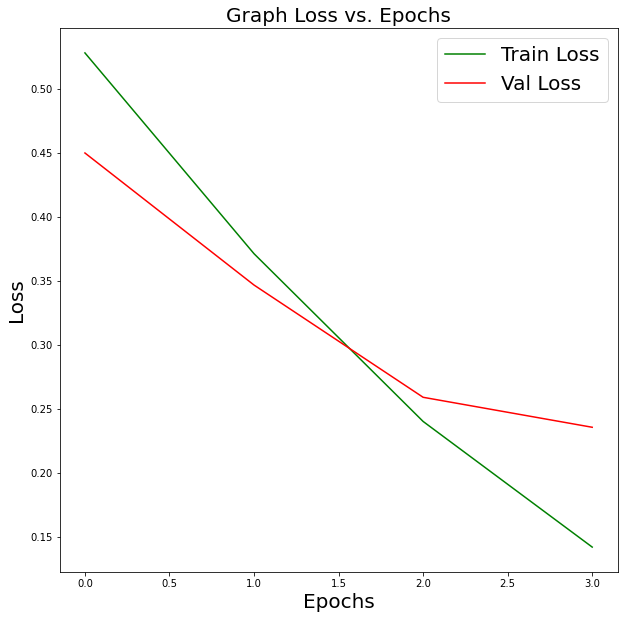

2309/2309 [==============================] - 0s 25us/step


In [1]:
import pandas as pd
import numpy as np

from ipynb.fs.full.nlp_model import text_classification

## Importing datasets

In [29]:
df = pd.read_csv("_dataframes/df_ayuda_clean.csv")
df = df[["text", "hour"]]
df["text"] = df["text"].str.replace("@ML_Ayuda", '')

df["text"] = df["text"].str.replace("[^0-9a-zA-Z ]+"," ")
df["text"] = df["text"].str.lower()

df.head(5)

,text,hour
0,expl came si lo puedo devolver y si me implic...,16
1,buen d a compro normalmente con dos cuit pero...,16
2,la cuesti n como saben cual es mi cuentas ex...,16
3,necesito aclarar algunos pagos que cargaron a...,16
4,katiapalomadelacruzlapoint operaci n 1325876...,16


## Predictions

Here I apply the text_classification function (developed in nlp_model.py file) for each tweet. Then, I create a new column with this data.

In [30]:
sentiment = [text_classification(df["text"][tweet]) for tweet in range(0, len(df))]

In [32]:
df["Sentiment"] = sentiment

In [33]:
df.head(20)

,text,hour,Sentiment
0,expl came si lo puedo devolver y si me implic...,16,Positive
1,buen d a compro normalmente con dos cuit pero...,16,Positive
2,la cuesti n como saben cual es mi cuentas ex...,16,Positive
3,necesito aclarar algunos pagos que cargaron a...,16,Positive
4,katiapalomadelacruzlapoint operaci n 1325876...,16,Positive
5,me figura tu clave venci contin o y me env a...,16,Positive
6,atencionprofeco mercadolibre mercadopagome...,16,Positive
7,significa que regresan el dinero a mi tarjeta...,16,Positive
8,mercadolibre hay alg n problema con el ingre...,16,Positive
9,mi banco me envi esto el n mero de autoriz...,16,Positive


In [35]:
pd.set_option('display.max_colwidth', -1)
df.head(20)

C:\Users\USUARIO\anaconda3\envs\Puente\lib\site-packages\ipykernel_launcher.py:1: FutureWarning: Passing a negative integer is deprecated in version 1.0 and will not be supported in future version. Instead, use None to not limit the column width.
  """Entry point for launching an IPython kernel.


,text,hour,Sentiment
0,expl came si lo puedo devolver y si me implica alg n costo a m me hubiera conformado con calificar pero ni eso me dejan,16,Positive
1,buen d a compro normalmente con dos cuit pero mi perfil alfi61 tiene un solo cuit y me crea problemas a l https t co yeasmwhs6k,16,Positive
2,la cuesti n como saben cual es mi cuentas existen miles de edgar,16,Positive
3,necesito aclarar algunos pagos que cargaron a mi tarjeta de credito en chile,16,Positive
4,katiapalomadelacruzlapoint operaci n 13258769682 tu reclamo n 5056925568,16,Positive
5,me figura tu clave venci contin o y me env a un supuesto c digo que nunca llega es comercial la cuenta https t co fcovf0qxrl,16,Positive
6,atencionprofeco mercadolibre mercadopagomex concilianet profeco ya la present desde el d a 4 de feb https t co 8uxesxn3fr,16,Positive
7,significa que regresan el dinero a mi tarjeta o que hacen el pago al vendedor,16,Positive
8,mercadolibre hay alg n problema con el ingreso de usuario dentro de la p gina mercadoibre llevo todo el https t co ossiwvbwz9,16,Positive
9,mi banco me envi esto el n mero de autorizaci n de la compra es 110049 debemos preguntarle a mercado https t co okkvzzbdzk,16,Positive


## Quick View

In [37]:
df[df["Sentiment"] == "Negative"]

,text,hour,Sentiment
10,mercadolibre ya no cuento con el n mero asociado me aparece verificar de otra forma seleccion el paso https t co lxsl35ttps,16,Negative
16,ala cuenta de mercadolibre castilloruben06 no puedo ingresar porque esta con un correo que no tengo acces https t co bst3ghxalo,16,Negative
17,mire un e mail alterno no le pas no tengo conocido no se puede andar pidiendo manda mi dinero de mercad https t co wib1weis0u,16,Negative
26,el pago lo hice con un link que me enviaron no desde mi cuenta y por este motivo creo no me da la opci n https t co 4gvwlgvyzw,16,Negative
30,ml mexico mercadolibre amazonmex ricardobsalinas que opina del mal servicio de ml mexico hay oportun https t co rr33ugtqaa,16,Negative
...,...,...,...
7493,el sistema no me deja mandar la foto porque el vendedor cancelo la compra como hago para mandar la foto el sistema no me deja,23,Negative
7495,gjsalmeron ml colombia wradiocolombia sicsuper eltiempo ya no sale nada al respecto como si ya me hu https t co ckkmj1yqk8,23,Negative
7497,cristian 28 77 jm gmail com,23,Negative
7498,consulta hice una venta el 15 de enero lo entregue el 18 pero me van a liberar el dinero reci n el 12 d https t co 3lo0sgrudh,23,Negative


In [38]:
df[df["Sentiment"] == "Positive"]

,text,hour,Sentiment
0,expl came si lo puedo devolver y si me implica alg n costo a m me hubiera conformado con calificar pero ni eso me dejan,16,Positive
1,buen d a compro normalmente con dos cuit pero mi perfil alfi61 tiene un solo cuit y me crea problemas a l https t co yeasmwhs6k,16,Positive
2,la cuesti n como saben cual es mi cuentas existen miles de edgar,16,Positive
3,necesito aclarar algunos pagos que cargaron a mi tarjeta de credito en chile,16,Positive
4,katiapalomadelacruzlapoint operaci n 13258769682 tu reclamo n 5056925568,16,Positive
...,...,...,...
7489,espero respuesta por parte de ustedes ante profeco gracias https t co 84lgxna4d5,23,Positive
7490,profeco https t co mpuovjcfyh,23,Positive
7491,mercadolibre mercadopago superfinanciera sicsuper que falta de respeto estoy maltrato esta permitido https t co jcimfeplk1,23,Positive
7494,mercadolibre mercadopago superfinanciera sicsuper cerraron el pqr que abr aqu la evidencia sus as https t co igaigmycxp,23,Positive


In general terms, we can see that negative tweets use "No" a lot of time, while the positives tend to be more neutral. However, for instance index=7491 seems to be negative. Let's look at the proportions of positive and negative tweets:

In [41]:
print("Positives: ", len(df[df["Sentiment"] == "Positive"])/ len(df))
print("Negatives: ", len(df[df["Sentiment"] == "Negative"])/ len(df))

Positives:  0.7034666666666667
Negatives:  0.2965333333333333


My intuition is that most of the mentions are made to claim something from the service or solve a problem, these tweets being written in a good way (positive). While the mentions to attack the service are minimal (negative).